# Import Packages

In [1]:
# built-in modules (no install required)
import os.path

# third-party modules (pip install required)
import pandas as pd
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *

# Load Data

In [2]:
K12_PATH = '../../data/k12_modulome'

In [3]:
ica_data = load_json_model(os.path.join(K12_PATH, 'k12_modulome.json.gz'))

# Set iM to Annotate

In [4]:
iM_to_annotate = ica_data.imodulon_names[193]
iM_to_annotate = 'Superoxide'
iM_to_annotate

'Superoxide'

# Plot Gene Weights

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/plotting.py:836: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  mod_cogs = ica_data.gene_table.loc[component_genes].COG


<AxesSubplot:xlabel='Gene Start', ylabel='193 Gene Weight'>

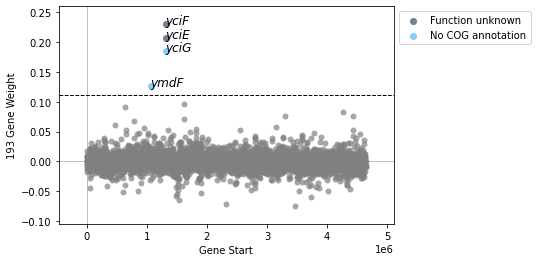

In [1160]:
plot_gene_weights(ica_data, iM_to_annotate, adjust_labels=False)

# Display Current Row

In [1161]:
ica_data.imodulon_table.loc[iM_to_annotate]

exp_var                           0.002678
imodulon_size                            4
PRECISE 2.0                            NaN
PRECISE 2.0_pearson                    NaN
PRECISE-1K                             NaN
PRECISE-1K_pearson                     NaN
PRECISE 2.0_spearman                   NaN
PRECISE-1K_spearman                    NaN
PRECISE                                NaN
PRECISE_pearson                        NaN
PRECISE_spearman                       NaN
enrichment_category                    NaN
system_category                        NaN
functional_category                    NaN
function                               NaN
confidence                             NaN
note                                   NaN
single_gene_dominant_technical         NaN
tcs                                    NaN
regulon_discovery                      NaN
ko                                     NaN
regulator                              NaN
pvalue                                 NaN
qvalue     

# Show Genes

In [1162]:
imod_genes = ica_data.view_imodulon(iM_to_annotate)
imod_genes['length'] = imod_genes['end'] - imod_genes['start']
imod_genes.sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,...,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM,length
b1258,0.229213,yciF,yciF,DUF892 domain-containing protein YciF,Function unknown,"RpoS,McbR,H-NS",P21362,1315270,1315770,-,...,False,438.5,NaN,True,True,4.617881,3.970205,1.807299,True,500
b1257,0.205940,yciE,yciE,DUF892 domain-containing protein YciE,Function unknown,"RpoD,RpoS,McbR,H-NS",P21363,1314718,1315224,-,...,False,305.0,NaN,True,True,4.883944,4.625318,1.301514,True,506
b1259,0.184332,yciG,yciG,protein YciG,No COG annotation,"RpoS,McbR,H-NS",P21361,1315856,1316035,-,...,False,67.5,NaN,True,True,5.036100,5.756911,2.321312,True,179
b4518,0.125812,ymdF,ymdF,conserved protein YmdF,No COG annotation,NaN,P56614,1068081,1068254,+,...,False,NaN,NaN,False,True,5.255318,5.480967,1.517524,True,173


# Regulatory Enrichment

## Compute TRN Enrichment

In [1151]:
trn_enrichment = ica_data.compute_trn_enrichment(iM_to_annotate, max_regs=1, evidence=[1, 2],
                                                 force=True, method='and')
trn_enrichment

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,192,TtdR,0.000002,0.000004,0.666667,0.5,0.571429,2.0,4.0,3.0,1.0


### Update Regulator Row

In [829]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = None

In [1152]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = trn_enrichment.loc[
    0,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
]

In [1153]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    [
        'trn_enrich_max_regs',
        'trn_enrich_evidence',
        'trn_enrich_method'
    ]
] = [
    1,
    '[1, 2]',
    'and'
]

## Specific Regulon Enrichment

If the gene list suggests >3 regulators involved simultaneously

In [49]:
iM_to_annotate

5

In [1052]:
specific_regulon = 'Fnr,NarL,Crp,ArcA,DpiA'.replace(',', '+')
specific_enrichment = ica_data.compute_regulon_enrichment(iM_to_annotate, specific_regulon, evidence=[0, 1, 2])
specific_enrichment

pvalue           4.544140e-13
precision        5.000000e-01
recall           7.142857e-01
f1score          5.882353e-01
TP               5.000000e+00
regulon_size     7.000000e+00
imodulon_size    1.000000e+01
n_regs           5.000000e+00
Name: Fnr+NarL+Crp+ArcA+DpiA, dtype: float64

### Update Regulator Row

In [1053]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = specific_enrichment[
    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
]
ica_data.imodulon_table.loc[iM_to_annotate, 'regulator'] = specific_regulon

In [1054]:
ica_data.imodulon_table.loc[iM_to_annotate, 'compute_regulon_evidence'] = '[0, 1, 2]'

# Plot iModulon Activities

<AxesSubplot:ylabel='185 iModulon\nActivity'>

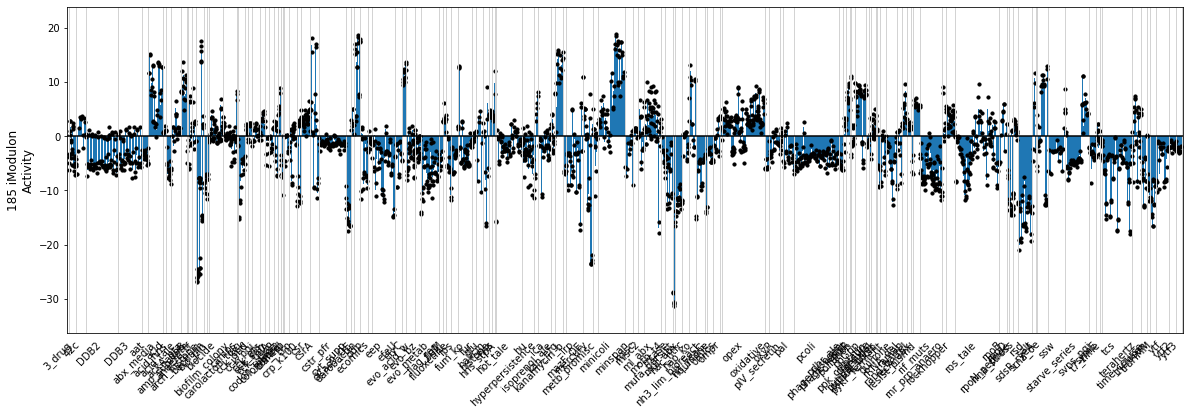

In [1083]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, ax=ax)

## Specific Project

In [929]:
ica_data.sample_table.loc[ica_data.A.loc[iM_to_annotate][ica_data.A.loc[iM_to_annotate].abs() > 10].index].project.value_counts()

opex             134
rif_muts          67
cstr_pfr          56
starve_series     52
evo_metab         48
                ... 
camps              3
hns_stpA           2
sdsR_ryeA          2
hot_tale           2
pixR               2
Name: project, Length: 71, dtype: int64

<AxesSubplot:ylabel='137 iModulon\nActivity'>

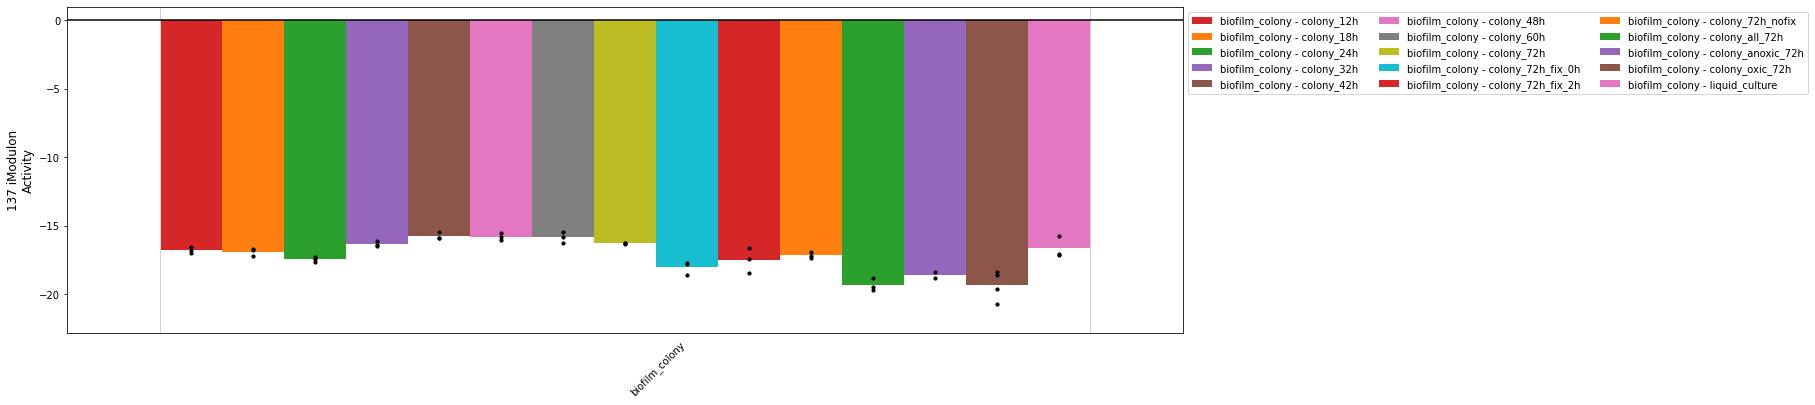

In [783]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, projects='biofilm_colony', ax=ax)

## Project Metadata

In [931]:
ica_data.sample_table[ica_data.sample_table['project'].isin(['rif_muts'])].sort_values(by='condition')[[
    'sample_id', 'Strain', 'Base Media', 'Strain Description',
       'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor',
       'Trace Element Mixture', 'Supplement', 'Temperature (C)', 'pH', 'LibraryLayout'
]]

,sample_id,Strain,Base Media,Strain Description,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH,LibraryLayout
SRX6809274,rif_muts__pykF(C8Y)__1,NaN,M9,BW25113,glucose(0.4%),NaN,NaN,NaN,NaN,37.0,7.0,SINGLE
SRX6809275,rif_muts__pykF(C8Y)__2,NaN,M9,BW25113,glucose(0.4%),NaN,NaN,NaN,NaN,37.0,7.0,SINGLE
SRX6809276,rif_muts__pykF(C8Y)__3,NaN,M9,BW25113,glucose(0.4%),NaN,NaN,NaN,NaN,37.0,7.0,SINGLE
SRX6809277,rif_muts__pykF(C8Y)_rif__1,NaN,M9,BW25113,glucose(0.4%),NaN,NaN,NaN,rifampicin(7.5uM),37.0,7.0,SINGLE
SRX6809278,rif_muts__pykF(C8Y)_rif__2,NaN,M9,BW25113,glucose(0.4%),NaN,NaN,NaN,rifampicin(7.5uM),37.0,7.0,SINGLE
...,...,...,...,...,...,...,...,...,...,...,...,...
SRX6809341,rif_muts__rpoB(T1037P;S508P)__2,NaN,M9,BW25113,glucose(0.4%),NaN,NaN,NaN,NaN,37.0,7.0,SINGLE
SRX6809342,rif_muts__rpoB(T1037P;S508P)__3,NaN,M9,BW25113,glucose(0.4%),NaN,NaN,NaN,NaN,37.0,7.0,SINGLE
SRX6809344,rif_muts__rpoB(T1037P;S508P)_rif__2,NaN,M9,BW25113,glucose(0.4%),NaN,NaN,NaN,rifampicin(7.5uM),37.0,7.0,SINGLE
SRX6809343,rif_muts__rpoB(T1037P;S508P)_rif__1,NaN,M9,BW25113,glucose(0.4%),NaN,NaN,NaN,rifampicin(7.5uM),37.0,7.0,SINGLE


# Category/Function/Confidence

In [577]:
ica_data.imodulon_table['functional_category'].value_counts()

Carbon Metabolism           32
Unknown                     26
Amino Acid Metabolism       20
Energy Metabolism           20
Metal Homeostasis           12
Extracellular Structures    11
Nitrogen Metabolism          8
Envelope Stress              8
Redox Stress                 5
Nucleotide Metabolism        4
Temperature Shock            4
DNA Damage                   3
Cofactor Metabolism          3
Genome Reduction             2
Phosphate Metabolism         2
Global Stress                2
Prophage                     1
Quorum Sensing               1
Resistance                   1
Phage Shock                  1
Translation                  1
Strain Difference            1
ALE Effects                  1
Acid Stress                  1
Name: functional_category, dtype: int64

In [1163]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    [
        'enrichment_category',
        'system_category',
        'functional_category',
        'function',
        'confidence',
        'note'
    ]
] = [
    'Unknown',
    'Unknown',
    'Unknown',
    'Unknown',
    1,
    None
]

# Miscellaneous Fields

In [1164]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    [
        'single_gene_dominant_technical',
        'ko',
        'regulon_discovery',
        'tcs'
    ]
] = [
    'False',
    'False',
    'False',
    'False'
]

# Re-Display Current Row

In [1165]:
ica_data.imodulon_table.loc[iM_to_annotate]

exp_var                           0.002678
imodulon_size                            4
PRECISE 2.0                            NaN
PRECISE 2.0_pearson                    NaN
PRECISE-1K                             NaN
PRECISE-1K_pearson                     NaN
PRECISE 2.0_spearman                   NaN
PRECISE-1K_spearman                    NaN
PRECISE                                NaN
PRECISE_pearson                        NaN
PRECISE_spearman                       NaN
enrichment_category                Unknown
system_category                    Unknown
functional_category                Unknown
function                           Unknown
confidence                             1.0
note                                  None
single_gene_dominant_technical       False
tcs                                  False
regulon_discovery                    False
ko                                   False
regulator                              NaN
pvalue                                 NaN
qvalue     

# Update IcaData Object and Tables

## Rename iModulon

In [5]:
iM_to_annotate

'Superoxide'

In [1026]:
len('Dihydroxyacetone')

16

In [6]:
ica_data.rename_imodulons({iM_to_annotate: 'SoxS'})

In [1186]:
sorted([n for n in ica_data.imodulon_names if isinstance(n, str) and 'Fnr' in n])

['Fnr-1', 'Fnr-2', 'Fnr-3']

## Save Tables

In [7]:
ica_data.imodulon_table.to_csv(os.path.join(K12_PATH, 'imodulon_table.csv'))
ica_data.A.to_csv(os.path.join(K12_PATH, 'A.csv'))
ica_data.M.to_csv(os.path.join(K12_PATH, 'M.csv'))
save_to_json(ica_data, os.path.join(K12_PATH, 'k12_modulome'), compress=True)